 Import libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load dataset

In [12]:
df=pd.read_csv('/content/advertising (2).csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


show the first five rows of the dataset

In [14]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.iloc[50:85]

,TV,Radio,Newspaper,Sales
50,199.8,3.1,34.6,16.4
51,100.4,9.6,3.6,10.7
52,216.4,41.7,39.6,22.6
53,182.6,46.2,58.7,21.2
54,262.7,28.8,15.9,20.2
55,198.9,49.4,60.0,23.7
56,7.3,28.1,41.4,5.5
57,136.2,19.2,16.6,13.2
58,210.8,49.6,37.7,23.8
59,210.7,29.5,9.3,18.4


It show the column names in the dataset

In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

 shape of the dataset (rows, columns)

In [ ]:
df.shape

(200, 4)

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Give information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


It is used to check any null values and how many null values are in the particular columns

In [ ]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


DATA VISULAIZATION

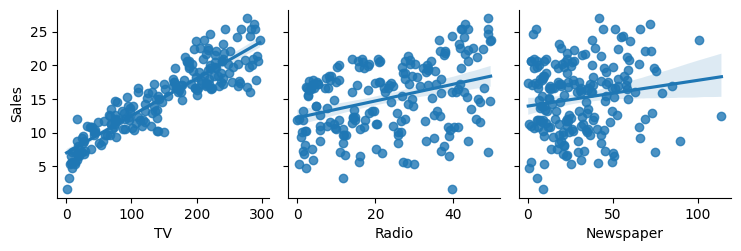

In [22]:
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

**HISTOGRAM VISUALS:**

<Axes: ylabel='Frequency'>

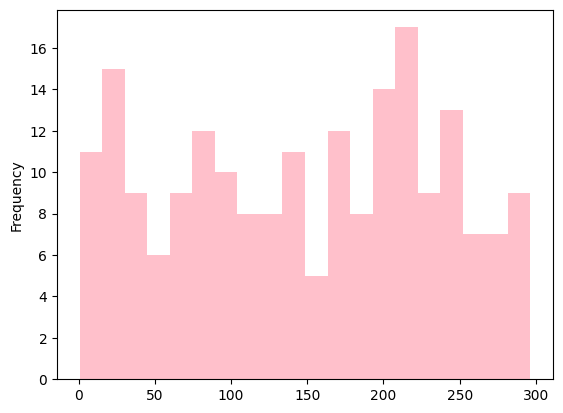

In [29]:
df['TV'].plot.hist(bins=20,color='pink')

<Axes: ylabel='Frequency'>

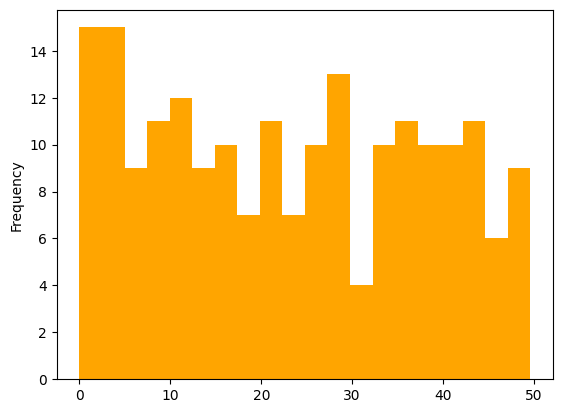

In [28]:
df['Radio'].plot.hist(bins=20,color='orange')

<Axes: ylabel='Frequency'>

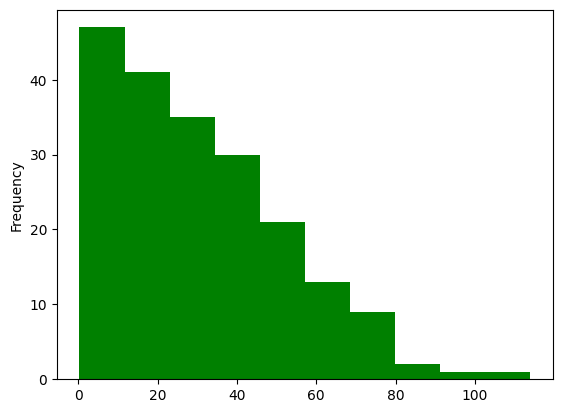

In [32]:
df['Newspaper'].plot.hist(bins=10,color='green')

The majority sales is the result of low advertising cost in newspaper

Linear regression plots to visualize the relationship between each independent variable and the dependent variable

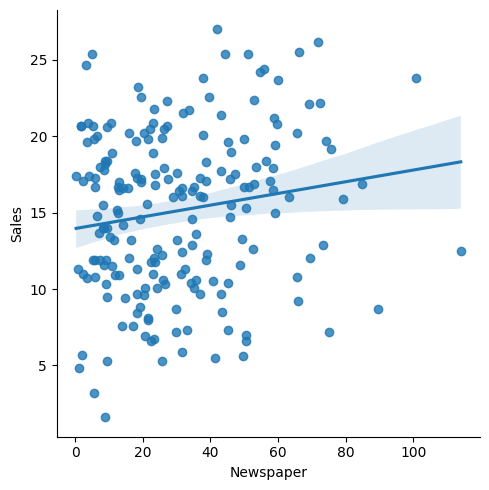

In [69]:
sns.lmplot(x='Newspaper',y= 'Sales', data=df)

**HEATMAP OBSERVATIONS**

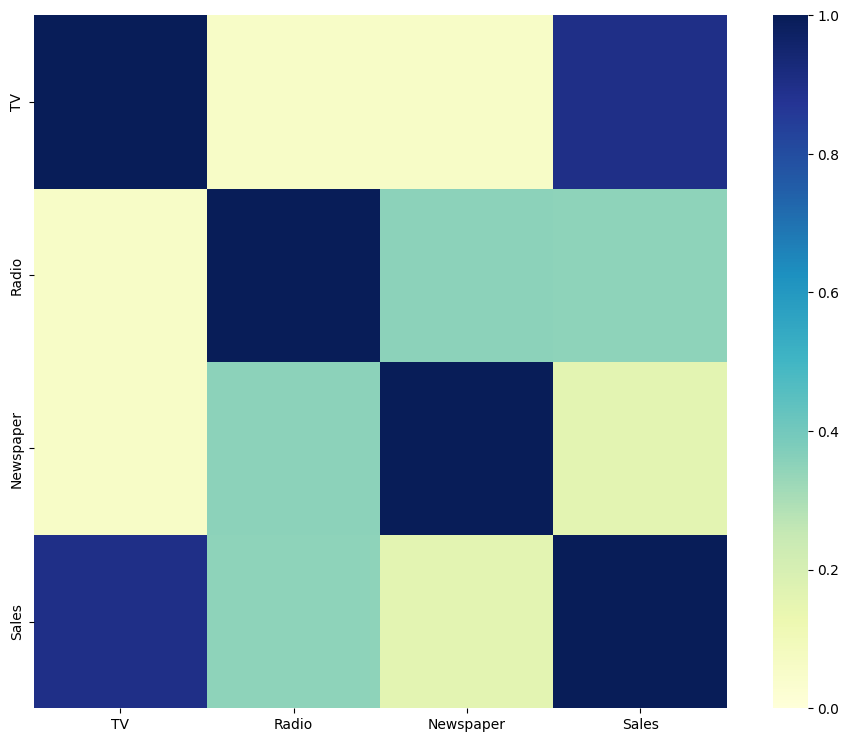

In [23]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=0, vmax=1, square=True, cmap="YlGnBu", ax=ax)
plt.show()

From the above view we can conclude that sales is highly coorelated with the TV

TRAINING MODEL


In [57]:
from sklearn.model_selection import train_test_split
xx= df.drop('Sales', axis=1)
yy= df[["Sales"]]
xx_train,xx_test,yy_train,yy_test = train_test_split(df[['TV']],df[['Sales']],test_size=0.2,random_state=42)

In [58]:
xx_train.head(5)


,TV
79,116.0
197,177.0
38,43.1
24,62.3
122,224.0


In [59]:
xx_train.shape

(160, 1)

In [60]:
xx_test.head(5)

,TV
95,163.3
15,195.4
30,292.9
158,11.7
128,220.3


In [61]:
xx_test.shape

(40, 1)

In [62]:
yy_train.head(5)

,Sales
79,11.0
197,14.8
38,10.1
24,9.7
122,16.6


In [63]:
yy_test.head(5)

,Sales
95,16.9
15,22.4
30,21.4
158,7.3
128,24.7


IMPORT MODELS

In [64]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(xx_train,yy_train)

LinearRegression()

In [65]:
pre=model1.predict(xx_test)
pre

array([[16.06747317],
       [17.84847567],
       [23.25806271],
       [ 7.65625887],
       [19.23000098],
       [11.17387752],
       [19.03581067],
       [ 9.78125562],
       [19.34651516],
       [16.72217191],
       [ 8.75482116],
       [10.12524988],
       [20.01785878],
       [ 7.30671633],
       [14.74697911],
       [16.45030549],
       [ 7.41213392],
       [17.97053815],
       [11.18497411],
       [20.17875932],
       [19.74044406],
       [10.76885203],
       [ 9.1154603 ],
       [20.92777906],
       [10.83543156],
       [ 9.97544593],
       [18.85271696],
       [14.73588252],
       [11.84522114],
       [ 7.47316516],
       [18.09260063],
       [10.84652815],
       [18.04266598],
       [ 7.94477018],
       [22.58117079],
       [20.22314567],
       [ 9.68693462],
       [22.19279018],
       [13.50970946],
       [ 8.53288939]])

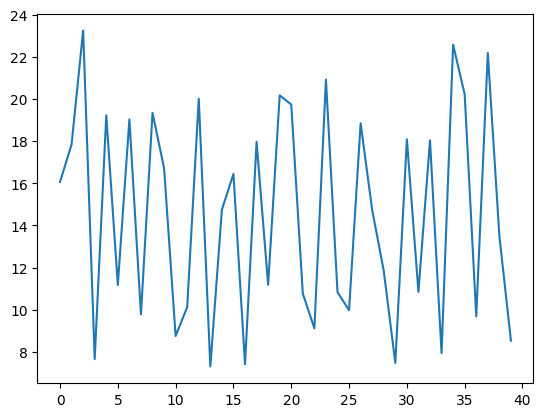

In [66]:
plt.plot(pre)

In [67]:
model1.coef_

array([[0.05548294]])

In [68]:
model1.intercept_

array([7.00710843])